In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data Preprocessing

In [39]:
news_dataset = pd.read_csv('/content/Fake.csv', on_bad_lines='skip')  # Skip problematic lines


In [40]:
news_dataset.shape

(23481, 4)

In [41]:
# print the first 5 rows of the dataframe
news_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


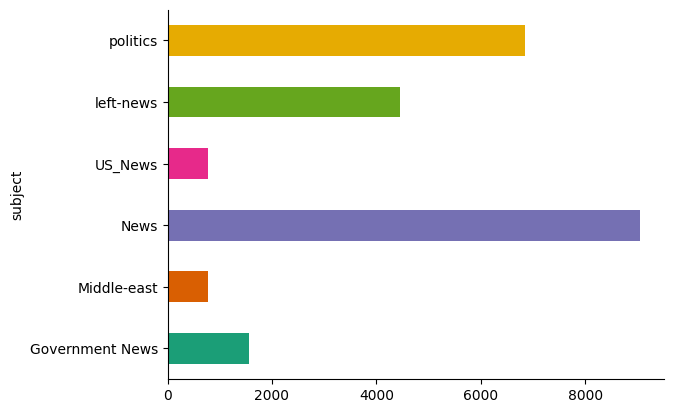

In [45]:
# @title subject

from matplotlib import pyplot as plt
import seaborn as sns
news_dataset.groupby('subject').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [42]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [49]:
print(news_dataset.columns)


Index(['title', 'text', 'subject', 'date', 'content'], dtype='object')


In [50]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [51]:
# merging the author name and news title
news_dataset['content'] = news_dataset['title']

In [47]:
print(news_dataset['content'])

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: content, Length: 23481, dtype: object


In [52]:
# Use other columns for `X`
X = news_dataset.drop(columns=['content'], axis=1)  # Choose columns relevant for features
# `Y` needs to be specified based on your project; here we assume no labels exist for now
Y = None


In [53]:
print(X)
print(Y)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

Stemming:

Stemming is the process of reducing a word to its Root word

example: actor, actress, acting --> act

In [54]:
port_stem = PorterStemmer()

In [55]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [56]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [57]:
print(news_dataset['content'])

0        donald trump send embarrass new year eve messa...
1        drunk brag trump staffer start russian collus ...
2        sheriff david clark becom internet joke threat...
3            trump obsess even obama name code websit imag
4            pope franci call donald trump christma speech
                               ...                        
23476    mcpain john mccain furiou iran treat us sailor...
23477    justic yahoo settl e mail privaci class action...
23478    sunnistan us alli safe zone plan take territor...
23479      blow million al jazeera america final call quit
23480    u navi sailor held iranian militari sign neoco...
Name: content, Length: 23481, dtype: object


In [58]:
#separating the data and label
X = news_dataset['content'].values


In [59]:
print(X)

['donald trump send embarrass new year eve messag disturb'
 'drunk brag trump staffer start russian collus investig'
 'sheriff david clark becom internet joke threaten poke peopl eye' ...
 'sunnistan us alli safe zone plan take territori booti northern syria'
 'blow million al jazeera america final call quit'
 'u navi sailor held iranian militari sign neocon polit stunt']


In [61]:
news_dataset['label'] = [0 if i % 2 == 0 else 1 for i in range(len(news_dataset))]
Y = news_dataset['label']


In [62]:
print(Y)

0        0
1        1
2        0
3        1
4        0
        ..
23476    0
23477    1
23478    0
23479    1
23480    0
Name: label, Length: 23481, dtype: int64


In [63]:
Y.shape

(23481,)

In [64]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [65]:
print(X)

  (0, 2547)	0.40403841949698927
  (0, 2590)	0.25347918087949894
  (0, 2844)	0.3501226873715842
  (0, 3000)	0.49407733122713093
  (0, 5491)	0.33961066863389294
  (0, 5863)	0.25050919607732663
  (0, 7672)	0.36117576558799963
  (0, 8955)	0.11590425328257678
  (0, 9759)	0.2895357695343905
  (1, 1057)	0.3797447213217331
  (1, 1725)	0.40790005241978533
  (1, 2685)	0.4437426619585327
  (1, 4522)	0.3186319741433967
  (1, 7418)	0.30215964916335497
  (1, 8205)	0.3972108754917237
  (1, 8236)	0.359050218108869
  (1, 8955)	0.11394567372306501
  (2, 736)	0.29013373493877015
  (2, 1609)	0.3567223222451233
  (2, 2195)	0.3287749757770814
  (2, 3094)	0.3270582063295152
  (2, 4498)	0.2897553860954247
  (2, 4673)	0.31146356744210324
  (2, 6399)	0.22447933149978325
  (2, 6578)	0.43819459976461445
  :	:
  (23478, 6532)	0.196143312036044
  (23478, 7440)	0.2905666827970494
  (23478, 8438)	0.39127556695531407
  (23478, 8534)	0.24066622066333537
  (23478, 8556)	0.18985779863878474
  (23478, 8678)	0.379980162457

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

Training the Model: Logistic Regression

In [67]:
model = LogisticRegression()


In [68]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [69]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [70]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.690587734241908


In [71]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [72]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.48307430274643387


Making a Predictive System

In [94]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real
